# Exercise sheet 10 - Introduction - Due date: July 6th

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - Variational Autoencoders (VAEs) (12 points)

1. Explain how far a VAE’s lower dimension representation differs from that learned
by a traditional autoencoder. How is that achieved? How far does the training
objective differ? (2 points)


- An autoencoder accepts input, compresses it, and then recreates the original input. This is an unsupervised technique because all you need is the original data, without any labels of known, correct results. The two main uses of an autoencoder are to compress data to two (or three) dimensions so it can be graphed, and to compress and decompress images or documents, which removes noise in the data.




- A variational autoencoder assumes that the source data has some sort of underlying probability distribution (such as Gaussian) and then attempts to find the parameters of the distribution.The one main use of a variational autoencoder is to generate new data that’s related to the original source data.




- Source: https://jamesmccaffrey.wordpress.com/2018/07/03/the-difference-between-an-autoencoder-and-a-variational-autoencoder/

2. Inform yourself about the applications of autoencoders in the biomedical field.
Explore the literature, then mention one application and explain how it works. (2 points)

There have been lots of other use-cases of autoencoder in biology. It can be used as a dimension reduction method for unsupervised clustering and visualization, similar to principal component analysis (PCA).

Autoencoder has many connections in biology. One example is the L1000 platform developed in the Connectivity Map project [1], in which 1,000 landmark genes are sufficient to recover 81% of the information in the full transcriptome, and significantly lower the cost of transcriptome profiling. These 1,000 genes can be loosely considered as the dimension-reduced latent variables.




Source: https://encodebox.medium.com/auto-encoder-in-biology-9264da118b83

3. Inform yourself about VAE variants, then explain the modifications and uses of
the following variants:

    
a. Beta-VAE (1 point)


Beta-VAE is a type of variational autoencoder that seeks to discovered disentangled latent factors. It modifies VAEs with an adjustable hyperparameter that balances latent channel capacity and independence constraints with reconstruction accuracy. The idea is to maximize the probability of generating the real data while keeping the distance between the real and estimated distributions small, under a threshold




Source: https://paperswithcode.com/method/beta-vae

b. Vector Quantised-VAE (VQ-VAE) (1 point)

VQ-VAE is a type of variational autoencoder that uses vector quantisation to obtain a discrete latent representation. It differs from VAEs in two key ways: the encoder network outputs discrete, rather than continuous, codes; and the prior is learnt rather than static.


    
    
Using the VQ method allows the model to circumvent issues of posterior collapse - where the latents are ignored when they are paired with a powerful autoregressive decoder - typically observed in the VAE framework.




Source: https://paperswithcode.com/method/vq-vae

4. Load the MNIST digits dataset from Keras datasets API. Normalize all your
values between 0 and 1, and flatten your images into vectors of size 784. Build a
simple VAE model using the following architecture:

  

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import layers
from keras.models import Model
from keras.layers import Input, Dense
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
mnist = tf.keras.datasets.mnist #28*28 image 
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#Normalizing values
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

#Flattening imgaes into a vector size of 784
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

a. Encoder: 1 hidden layer with an input, using ReLU activation function (1
point)

b. Decoder: 1 hidden layer using sigmoid activation function (1 point)

In [3]:
encoding_dim = 32 
input_img =Input(shape=(784,)) #input image
encoded = Dense(encoding_dim, activation='relu')(input_img) #encoder with 1 hidden layer
decoded = Dense(784, activation='sigmoid')(encoded) #decoder with 1 hidden layer 

#building the VAE model
vae = Model(input_img, decoded)

#compiling encoder model
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = vae.layers[-1]
#compiling decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Your encoder should take an image input of 784 floats and encode it to 32 floats,
while the decoder should take the encoded input and reconstruct an image of
784 floats. Compile your model using the following:

1. Adam optimizer (0.5 point)


2. Binary cross entropy loss function (0.5 point)


2. Batch size of 256 (0.5 point)


In [4]:
#compiling VAE model
vae.compile(optimizer='adam', loss='binary_crossentropy')

Train your model using the following parameters:


    
    
1. 50 epochs (0.5 point)



Batch size of 256 (0.5 point)
Use your model to predict 10 digits from the MNIST dataset, then plot the original and reconstructed images for reference. (2 points)

In [5]:
#training the model with 50 epochs and a batch size of 256
vae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 27s 16ms/step - loss: 0.3660 - val_loss: 0.1648
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1598 - val_loss: 0.1496
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1477 - val_loss: 0.1424
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1408 - val_loss: 0.1374
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1362 - val_loss: 0.1333
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1323 - val_loss: 0.1300
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1290 - val_loss: 0.1275
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1265 - val_loss: 0.1255
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1247 - val_loss: 0.1240
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1235 - val_l

Use your model to predict 10 digits from the MNIST dataset, then plot the original
and reconstructed images for reference. (2 points)

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

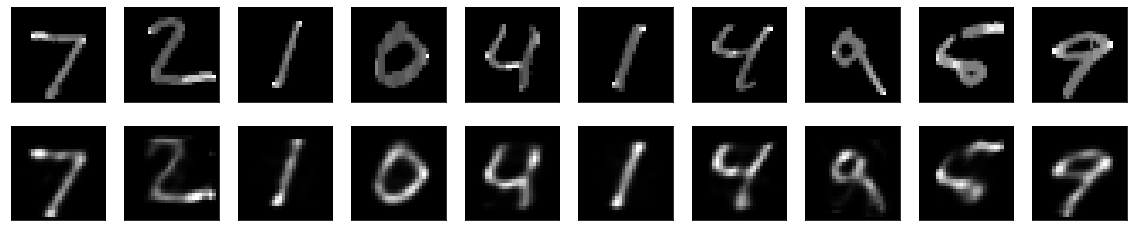

In [7]:
n = 10  #Number of digits
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Exercise 2 - Generative Adversarial Networks (GANs) (6 points)

<b>1. What are the specific properties of GANs in comparison to VAEs? (2 points)</b>

- Although VAE generative model and an inference model,and it also learns the underlying data distribution similar to GANS using unsupervised learning,



<b>GANs yield better results as compared to VAE as:</b>


<b>1.</b>There is no assumption and optimizing the the lower variational bound in GAN.



<b>2.</b>No explicit probability density estimation.



<b>3.</b>GAN learns the true posterior distribution and so it can generate sharp images (high quality image and video generation, drug discovery) which is a failure in case of VAE. GAN are better at producing realistic images

<b>2. Familiarize yourself with the following type of GANS and briefly explain how each
technique differs from vanilla GANs and give an application example for each
type.(4 points) </b>

<b>a. Deep Convolutional GANs (DCGANs):</b>



- similar to GAN but uses Deep Convolutional networks in place of those fully-connected networks.




- deep convolutional neural networks for both the generator and discriminator models and configurations for the models and training that result in the stable training of a generator model.




- DCGAN will be more fitting for image/video data, but GAN can be applied to wider domains




- generate images with high resolution and with less noise.

<b>b. Wasserstein GANs (WGANs):</b>



- uses the 1-Wasserstein distance, rather than the JS-Divergence, to measure the difference between the model and target distributions. 



- overcomes undesirable behavior of the JSD in the presence of singular measure.



- it is possible to focus on particular image features of interest.


<b>c. Self-Attention GANs (SAGANs):</b>



-  GANs generate high-resolution details as a function of only spatially local points in lower-resolution feature maps but in SAGAN, details can be generated using cues from all feature locations.




- incorporate a selfattention mechanism into the GAN framework which  is effective in modeling long-range dependencies.

<b>d. BigGANs:</b>


- trains GANs at large scales



-  used for scaling generation to high-resolution, high-fidelity images

# Exercise 3 - LSTMs & Transformers (7 points)

<b>1. General architecture of LSTM unit. (1 point)</b>

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

<b>2. What is a Bidirectional LSTM? And what are its advantages over a classical
LSTM? (2 points)</b>

- Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.




- In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.




- Using bidirectional LSTM will manage your inputs in two ways, one from past to future and one from future to past and it differs this approach from unidirectional is that in the LSTM which runs backward you preserve information from the future and using the two hidden states combined, you will be able at any point in time to preserve information from both past and future.

<b>3. Both transformers and LSTMs retain memory of the generated output. What are the differences between transformers and LSTMs, and what are the advantages of transformers compared to LSTMs? (2 points)</b>

<b>Differences between transformers and LSTMs:</b>

- Transformer model is based on a self-attention mechanism.

- Transformers are non sequential: sentences are processed as a whole rather than word by word but LSTMs are sequential processing: sentences must be processed words by words.




<b>Advantages of transformers compared to LSTMs:</b>

- Transformers avoid recursion in order to allow parallel computation, LSTMs can't be trained in parallel.

- Transformers do not suffer from long dependency issues.

<b>4. The image below depicts the architecture of a self-attention model.</b>

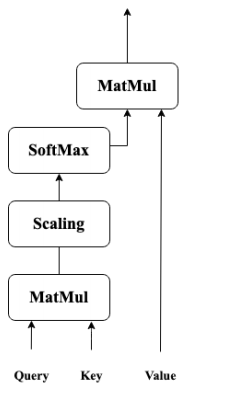

<b>Using the following arrays as the Query, Key and the Value vectors, calculate the
attention matrix 𝐴(𝑄, 𝐾, 𝑉)(2 points)

● Query Vector: [ 0.8, 0.5, 0.21 ]



● Key Vector: [ 0.1, 0.62, 0.73 ]

    
    
● Value Vector: [ 0.6, 0.2, 0.9 ]</b>

In [8]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weight.
         q, k, v must have matching front dimensions.
         k, v must have a matching penultimate dimension, for example: seq_len_k = seq_len_v.
         Although the mask has different shapes according to its type (filled or forward),
         But the mask must be able to perform broadcast conversion in order to sum.

         Parameters:
         q: requested shape == (..., seq_len_q, depth)
         k: The shape of the primary key == (..., seq_len_k, depth)
         v: The shape of the value == (..., seq_len_v, depth_v)
         mask: Float tensor whose shape can be converted to
                     (..., seq_len_q, seq_len_k). The default is None.

         return value: 
         Output, attention weight
    """

    matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

    # Zoom matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # Add mask to the scaled tensor.
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    # softmax is normalized on the last axis (seq_len_k), so the score
    # Add is equal to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

    return output, attention_weights

In [9]:
import tensorflow as tf

Query = [ 0.8, 0.5, 0.21 ]
Key = [ 0.1, 0.62, 0.73 ]
Value = [ 0.6, 0.2, 0.9 ]
scaled_dot_product_attention(Query, Key, Value, None)

InvalidArgumentError: In[0] and In[1] ndims must be == 2: 1 [Op:MatMul]